# Regresión logística
Se desea desarrollar un clasificador de imágenes de gatos y perros utilizando regresión logística.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sklearn
import kagglehub
from PIL import Image
import glob

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ruta_imagenes_descarga = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")


In [3]:
ruta_imagenes_descarga

'/Users/maxirodriguez/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1'

---

## Función sigmoide



$$ σ = \frac{1}{1 + e^{-z}} $$


## Inversa de la Función Sigmoide

$$ σ * (1 + e^{-z}) = 1  $$

$$ e^{-z} = \frac{1}{σ} - 1 $$

$$ z = -log(\frac{1}{σ} - 1) $$

$$ z = -log(\frac{1 - \sigma}{\sigma}) $$

$$ z = log(\frac{\sigma}{1-\sigma}) $$

### Derivada del sigmoide

$$ \frac{dσ}{dz} = \frac{e^{-z}}{(1+e^{-z})^2}. $$

Sabemos que

$$ 1 - \sigma = 1 - \frac{1}{1 + e^{-z}} = \frac{(1 + e^{-z}) -  1 }{1 + e^{-z}} = \frac{e^{-z}}{(1+e^{-z})}, $$

por ende

$$ \frac{dσ}{dz} = \frac{1}{(1+e^{-z})} \cdot \frac{e^{-z}}{(1+e^{-z})} = σ\cdot(1-σ). $$

### Funcion Costo

$$ J = (y - \hat{y}) =  (y - ϕ(X)) = 𝟙(y \neq ϕ(X)) $$

-----
## Pre-procesamiento

In [4]:
import re
import os

def sort_by_folder_then_number(file_path):
    folder_name = os.path.basename(os.path.dirname(file_path))  # Obtiene el nombre de la carpeta
    file_name = os.path.basename(file_path)  # Obtiene el nombre del archivo
    number = int(re.findall(r'\d+', file_name)[0])  # Extrae el número del nombre
    return (folder_name, number)  # Devuelve una tupla (carpeta, número)

# Ordena las rutas de las imágenes primero por carpeta y luego por número
ruta_imagenes = sorted(glob.glob(ruta_imagenes_descarga + '/**/*.jpg', recursive=True), key=sort_by_folder_then_number)


In [5]:
imagenes = []

for path in ruta_imagenes:
    with Image.open(path) as img:
      img = img.resize((16, 16))
      img = img.convert("L")
      imagenes.append(img)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [6]:
# generar 5 numeros aleatorios entre 0 y 24998

random = np.random.randint(0, 24999, size=5)
random


array([18938,  3375,  8000, 21963, 10642])

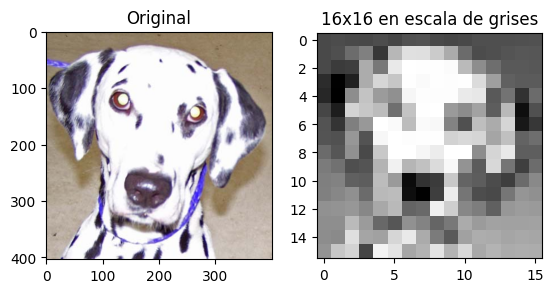

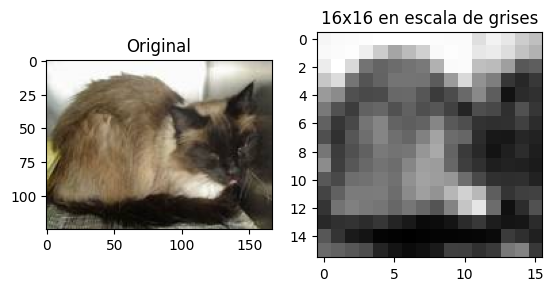

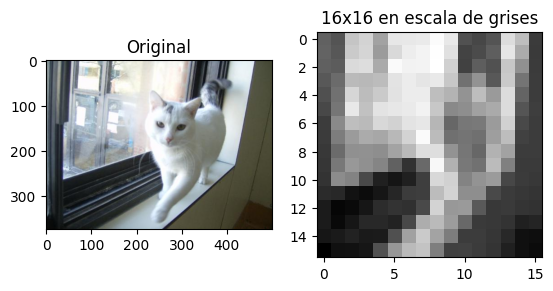

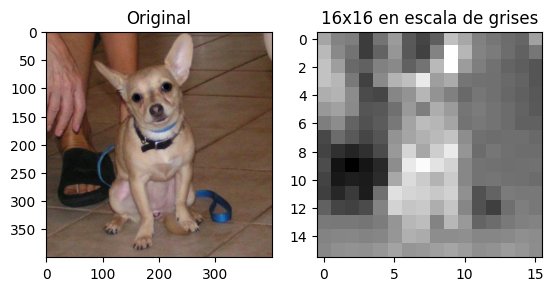

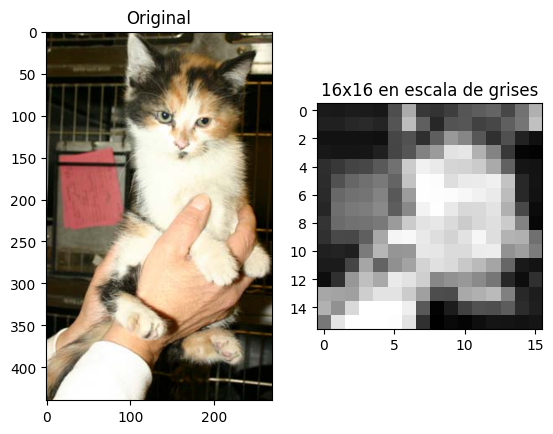

In [7]:
for i in random:
  plt.figure()
  plt.subplot(1, 2, 1)
  plt.imshow(Image.open(ruta_imagenes[i]))
  plt.title("Original")

  plt.subplot(1, 2, 2)  # Create a subplot for the grayscale image
  plt.imshow(imagenes[i], cmap='gray')
  plt.title("16x16 en escala de grises")
  
  plt.show()  # Show the figure after both subplots are created


imagenes tiene 3 dimensiones, necesito 2

In [8]:
Imagenes_np = [np.array(img).flatten() for img in imagenes]


(Imagenes_np[0]).size

256

In [9]:
gatos = []
perros = []

for i in range(0, 12499):
  gatos.append(0)


for i in range(0, 12499):
  perros.append(1)

y = gatos + perros

In [10]:
from sklearn.model_selection import train_test_split

Imagenes_train, Imagenes_test, y_train, y_test = train_test_split(Imagenes_np, y, test_size=4998)

print(len(Imagenes_train))
print(len(Imagenes_test))

20000
4998


In [11]:
regresor_logistico = sklearn.linear_model.LogisticRegression(penalty=None, max_iter=10000)

regresor_logistico.fit(Imagenes_train, y_train)

LogisticRegression(max_iter=10000, penalty=None)

In [12]:
def accuracy(y_pred, y_test):
  return np.sum(y_pred == y_test) / len(y_test)


Y_prediccion_train = regresor_logistico.predict(Imagenes_train)
Y_prediccion_test = regresor_logistico.predict(Imagenes_test)


accuracy_train = accuracy(Y_prediccion_train, y_train)
accuracy_test = accuracy(Y_prediccion_test, y_test)

print("Precision de entrenamiento: ", accuracy_train)
print("Precision de Prueba: ", accuracy_test)

Precision de entrenamiento:  0.58785
Precision de Prueba:  0.5658263305322129


In [13]:
regresor_logistico.classes_

array([0, 1])

In [14]:
def CrossEntropy(X, Y, regresor):
  Y_prediccion_log = regresor.predict_log_proba(X)

  cross_entropy = []

  for i in range(0, len(Y_prediccion_log)):
    if Y[i] == 0:
      cross_entropy.append(-Y_prediccion_log[i][0])
    else:
      cross_entropy.append(-Y_prediccion_log[i][1])

  return np.mean(cross_entropy)

cross_entropy_train = CrossEntropy(Imagenes_train, y_train, regresor_logistico)
cross_entropy_test = CrossEntropy(Imagenes_test, y_test, regresor_logistico)

print("Cross Entropy de entrenamiento: ", cross_entropy_train)
print("Cross Entropy de Prueba: ", cross_entropy_test)

Cross Entropy de entrenamiento:  0.6717802166439099
Cross Entropy de Prueba:  0.6871842076007492


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


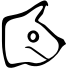

In [15]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://raw.githubusercontent.com/mvera1412/TA136-TB056-TB057-8625/main/data/consejero.png'

response = requests.get(url, verify=False)

consejero = Image.open(BytesIO(response.content))
consejero


In [16]:
consejero = consejero.resize((16,16)).convert('L')

prediccion_consejero = regresor_logistico.predict([np.array(consejero).flatten()])
prediccion_consejero_proba = regresor_logistico.predict_proba([np.array(consejero).flatten()])
print("Predicción: ", prediccion_consejero[0])
print("Probabilidades: ", prediccion_consejero_proba[0])
# 0 = gato
# 1 = perro

Predicción:  0
Probabilidades:  [0.52652615 0.47347385]


In [17]:
matriz_polinomica = sklearn.preprocessing.PolynomialFeatures(2)
ct = sklearn.compose.ColumnTransformer(
    [("polinomio", matriz_polinomica, slice(0, None))])
escalador = sklearn.preprocessing.StandardScaler()


Sci-kit recomienda "l2" para penalizaciones grandes. La funcion $R(w)$ queda de la forma:

$$ R(w) = \frac{1}{2} w^T * w $$

In [18]:
lambdas = [50, 100, 200, 500, 1000, 2000, 5000, 10000]

cross_entropy_train = []
cross_entropy_test = []

for i in lambdas:
  regresor_logistico_ = sklearn.linear_model.LogisticRegression(penalty='l2', C=(1/i), max_iter=500, tol=0.001)
  pipe = sklearn.pipeline.Pipeline([
    ("transformador", ct),
    ("escalador", escalador),
    ("regresor", regresor_logistico_)
  ])

  pipe.fit(Imagenes_train, y_train)

  cross_entropy_train.append(CrossEntropy(Imagenes_train, y_train, pipe))
  cross_entropy_test.append(CrossEntropy(Imagenes_test, y_test, pipe))

  print("Lambda: ", i)
  print("Cross Entropy de entrenamiento: ", cross_entropy_train[-1])
  print("Cross Entropy de Prueba: ", cross_entropy_test[-1])


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Lambda:  50
Cross Entropy de entrenamiento:  0.3631777619744179
Cross Entropy de Prueba:  0.7528826102347546


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Lambda:  100
Cross Entropy de entrenamiento:  0.4166435882795141
Cross Entropy de Prueba:  0.6828668999442579
Lambda:  200
Cross Entropy de entrenamiento:  0.4562752980439658
Cross Entropy de Prueba:  0.6544663851878928
Lambda:  500
Cross Entropy de entrenamiento:  0.5004260393109725
Cross Entropy de Prueba:  0.6375954006203212
Lambda:  1000
Cross Entropy de entrenamiento:  0.5370583582512302
Cross Entropy de Prueba:  0.6294302258774791
Lambda:  2000
Cross Entropy de entrenamiento:  0.5635555186792368
Cross Entropy de Prueba:  0.6280656882310968
Lambda:  5000
Cross Entropy de entrenamiento:  0.5912272320287187
Cross Entropy de Prueba:  0.630070597075378
Lambda:  10000
Cross Entropy de entrenamiento:  0.6064722790503884
Cross Entropy de Prueba:  0.6342343201568506


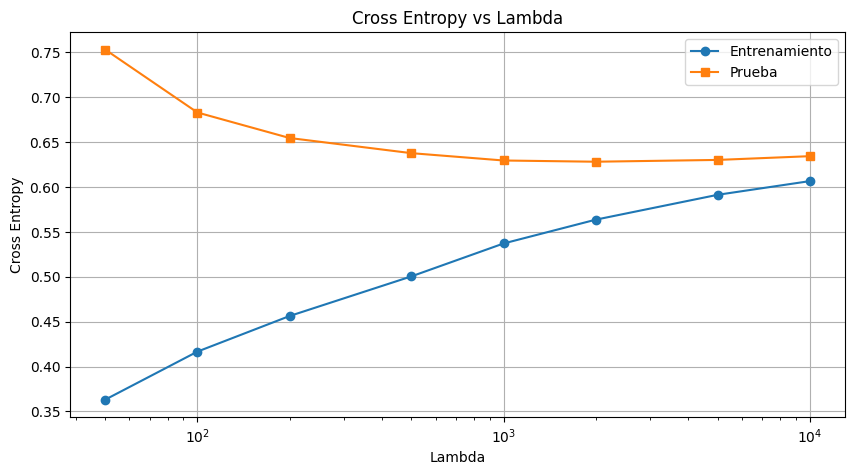

In [24]:
plot = plt.figure(figsize=(10, 5))
plt.plot(lambdas, cross_entropy_train, label='Entrenamiento', marker='o')
plt.plot(lambdas, cross_entropy_test, label='Prueba', marker='s')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy vs Lambda')
plt.legend()
plt.grid()
plt.show()

In [20]:
cross_entropy_minimo_test = min(cross_entropy_test)
indice_lambda_minimo = cross_entropy_test.index(cross_entropy_minimo_test)

lambda_minimo = lambdas[indice_lambda_minimo]
print("Lambda óptimo: ", lambda_minimo)
print("Cross Entropy mínimo de prueba: ", cross_entropy_minimo_test)

Lambda óptimo:  2000
Cross Entropy mínimo de prueba:  0.6280656882310968


In [21]:
regresor_logistico_optimo = sklearn.linear_model.LogisticRegression(penalty='l2', C=(1/lambda_minimo), max_iter=500)
pipe = sklearn.pipeline.Pipeline([
    ("transformador", ct),
    ("escalador", escalador),
    ("regresor", regresor_logistico_optimo)
  ])

pipe.fit(Imagenes_train, y_train)

Y_prediccion_train = pipe.predict(Imagenes_train)
Y_prediccion_test = pipe.predict(Imagenes_test)


accuracy_train = accuracy(Y_prediccion_train, y_train)
accuracy_test = accuracy(Y_prediccion_test, y_test)

print("Precision de entrenamiento: ", accuracy_train)
print("Precision de Prueba: ", accuracy_test)



Precision de entrenamiento:  0.718
Precision de Prueba:  0.6586634653861545


In [22]:
prediccion_consejero = pipe.predict([np.array(consejero).flatten()])
prediccion_consejero
# 0 = gato
# 1 = perro

array([0])

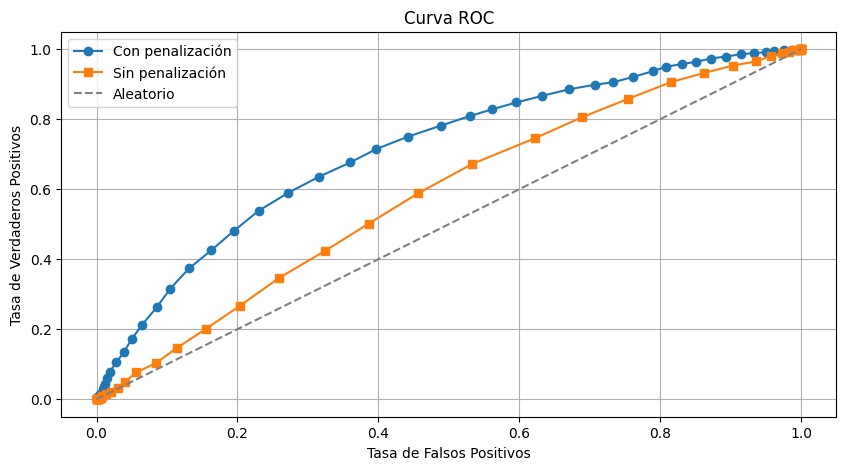

In [23]:
predicciones_con_penalizacion = pipe.predict_proba(Imagenes_test)

def CurvasRoc(predicciones, y_test):
    t = np.linspace(0, 1, 50)

    Falsos_positivos = []
    Falsos_negativos = []
    Verdaderos_positivos = []
    Verdaderos_negativos = []

    # Me parece mas facil pensarlo con la probabilidad de ser positivo
    for j in t:
        fp = fn = tp = tn = 0
        for i in range(len(predicciones)):
            if predicciones[i][1] > j and y_test[i] == 1:
                tp += 1
            elif predicciones[i][1] > j and y_test[i] == 0:
                fp += 1
            elif predicciones[i][1] < j and y_test[i] == 0:
                tn += 1
            elif predicciones[i][1] < j and y_test[i] == 1:
                fn += 1
        Falsos_positivos.append(fp)
        Falsos_negativos.append(fn)
        Verdaderos_positivos.append(tp)
        Verdaderos_negativos.append(tn)

    Tasa_de_falsos_positivos = np.array(Falsos_positivos) / (np.array(Falsos_positivos) + np.array(Verdaderos_negativos))
    Tasa_de_verdaderos_positivos = np.array(Verdaderos_positivos) / (np.array(Verdaderos_positivos) + np.array(Falsos_negativos))

    return Tasa_de_falsos_positivos, Tasa_de_verdaderos_positivos

Tasa_de_falsos_positivos_con_penalizacion, Tasa_de_verdaderos_positivos_con_penalizacion = CurvasRoc(predicciones_con_penalizacion, y_test)
Tasa_de_falsos_positivos_sin_penalizacion, Tasa_de_verdaderos_positivos_sin_penalizacion = CurvasRoc(regresor_logistico.predict_proba(Imagenes_test) , y_test)

tasa_fp_al_azar = np.linspace(0, 1, 50)
tasa_tp_al_azar = tasa_fp_al_azar


plt.figure(figsize=(10, 5))
plt.plot(Tasa_de_falsos_positivos_con_penalizacion, Tasa_de_verdaderos_positivos_con_penalizacion, marker='o')
plt.plot(Tasa_de_falsos_positivos_sin_penalizacion, Tasa_de_verdaderos_positivos_sin_penalizacion, marker='s')
plt.plot(tasa_fp_al_azar, tasa_tp_al_azar, linestyle='--', color='gray')
plt.legend(['Con penalización', 'Sin penalización', 'Aleatorio'])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.grid()
plt.show()






